In [17]:
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

### 0. load and explore the dataset

In [2]:
# no points for dataset exploring this time
# but you should have a look on the dataset and confirm all features are boolean values

df = pd.read_csv('Lab2_clustering_dataset.csv')
data = df.iloc[:,1:].to_numpy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB
None


,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


### 1. Perform k-means clustering. Determine the optimal number of clusters using e.g. elbow method

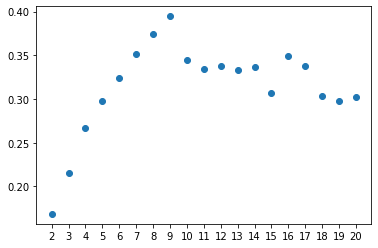

In [3]:
###!!! Grading criteria

# +1 point if show a list/plot of evaluations of clustering performance w.r.t. number of clusters
# evaluation can be sum/average of distances of all datapoints to corresponding centers
# prefer clustering validation methods like Silhouette Coefficient


score = [silhouette_score(data, KMeans(n_clusters=k).fit(data).labels_) for k in range(2, 21)]
plt.scatter(list(range(2,21)),score)
plt.xticks(list(range(2,21)))
plt.show()

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


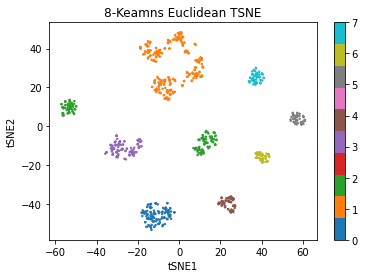

In [4]:
# Seems that the best number of clusters is 8
# try to visualize clusters with TSNE
tsne_coords = TSNE(n_components=2).fit_transform(data)
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=KMeans(n_clusters=8).fit(data).labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("8-Keamns Euclidean TSNE")
plt.colorbar()

### 2. Perform clustering with different clustering methods implemented in Scikit Learn.

In [5]:
# Here we fix the number of cluster at 8
# because the number of clusters should mainly rely on the definiation of distance

###!!! Grading criteria
#+1 points if tried at least two clustering methods other than KMeans


In [6]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:369: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(


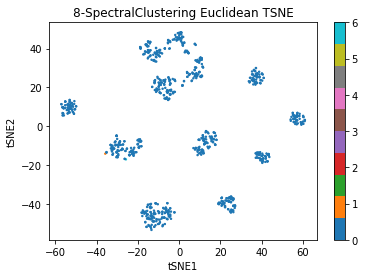

In [7]:
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=SpectralClustering(n_clusters=8).fit(data).labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("8-SpectralClustering Euclidean TSNE")
plt.colorbar()
plt.show()

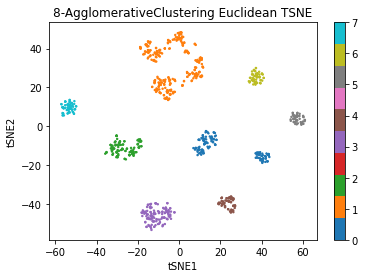

In [8]:
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=AgglomerativeClustering(n_clusters=8).fit(data).labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("8-AgglomerativeClustering Euclidean TSNE")
plt.colorbar()
plt.show()

### 3. Try clustering with another distance metric (e.g. Cosine, Jaccard, etc).

In [9]:
# KMeans in scikit-learn does not accept distance metric other than Euclidean distance
# Therefore we decide to give bonus points if you try KMeans with different distance metric
# this can be done either by using KMeans implementations in other packakges, or implement KMeans algorithm by yourself

###!!! Grading criteria
# +1 point if tried Cosine and Jaccard distance for methods other than KMeans
# +1 bonus point if tried Cosine and Jaccard distance for KMeans

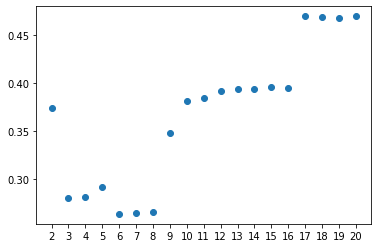

In [10]:
score = [silhouette_score(data.astype(bool), AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='average').fit(data.astype(bool)).labels_, metric='jaccard') for k in range(2, 21)]
plt.scatter(list(range(2,21)),score)
plt.xticks(list(range(2,21)))
plt.show()

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/s

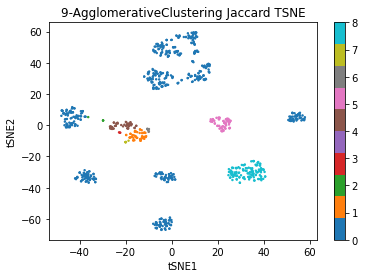

In [11]:
tsne_coords = TSNE(n_components=2,metric='jaccard').fit_transform(data)
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=AgglomerativeClustering(n_clusters=9, affinity='jaccard', linkage='average').fit(data).labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("9-AgglomerativeClustering Jaccard TSNE")
plt.colorbar()

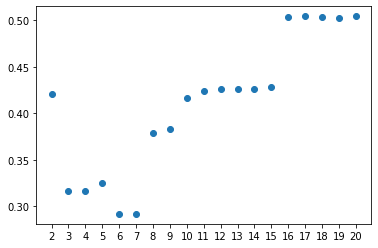

In [12]:
score = [silhouette_score(data, AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average').fit(data).labels_, metric='cosine') for k in range(2, 21)]
plt.scatter(list(range(2,21)),score)
plt.xticks(list(range(2,21)))
plt.show()

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


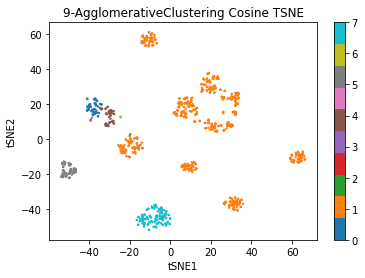

In [13]:
tsne_coords = TSNE(n_components=2,metric='cosine').fit_transform(data)
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=AgglomerativeClustering(n_clusters=8, affinity='cosine', linkage='average').fit(data).labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("9-AgglomerativeClustering Cosine TSNE")
plt.colorbar()

### 4. Visualize results using the dimensionality reduction (UMAP or tSNE) technique with respect to the cluster labels.

In [14]:
###!!! Grading criteria
# +1 points if visualize all of your clustering cases here, you can also attach the visualization after each clsutering case like I did above

### 5. Compare clustering results

In [15]:
###!!! Grading criteria
# +1 points if have a paragraph to discuss results you got

In [16]:
def KMeans(X, K=10, Max_iter=10):
    
    N, D = X.shape
    
    c = X[:K, :].clone() 

    x = X.clone().reshape(N,1,D)
    cc = c.reshape(1,K,D)

    for i in range(Max_iter):
        
        distances = ((x - cc) ** 2).sum(-1)  
        cl = D_ij.argmin(dim=1).long().view(-1)  

        c.zero_()
        c.scatter_add_(0, cl[:, None].repeat(1, D), x)

        Ncl = torch.bincount(cl, minlength=K).type_as(c).view(K, 1)
        c /= Ncl 

    return cl, c